In [67]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os


np.random.seed(1981)
tf.random.set_seed(1981)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
tf.__version__, keras.__version__

('2.0.0-alpha0', '2.2.4-tf')

# Functional API

### DATASET
This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

The following is the description from the book author:

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The dataset in this directory is almost identical to the original, with two differences: 207 values were randomly removed from the total_bedrooms column, so we can discuss what to do with missing data. An additional categorical attribute called ocean_proximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data. Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing."

About the Data (From Luís Torgo page):
http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html

This is a dataset obtained from the StatLib repository. Here is the included description:

"We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value)."

In [83]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 55us/sample - loss: 1.7935 - val_loss: 1.1242
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7584 - val_loss: 0.7740
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6860 - val_loss: 0.6590
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6365 - val_loss: 0.5946
Epoch 5/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5967 - val_loss: 0.5593
Epoch 6/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5621 - val_loss: 0.5319
Epoch 7/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5330 - val_loss: 0.5065
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5091 - val_loss: 0.4926
Epoch 9/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4894 - val_l

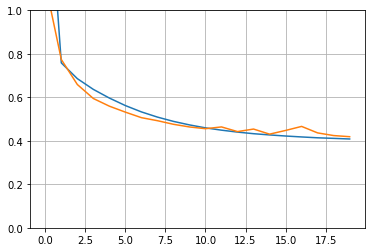

In [86]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [87]:
y_pred

array([[0.666851 ],
       [1.5663123],
       [3.6176703]], dtype=float32)

### Functional API
Not all neural network models are simply sequential. Some may have complex topologies. 

In [88]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [89]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           930         dense_17[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_18[0][0]             

In [90]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 60us/sample - loss: 2.1116 - val_loss: 2.5496
Epoch 2/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.7438 - val_loss: 0.7749
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6542 - val_loss: 0.6222
Epoch 4/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.6047 - val_loss: 0.5735
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5674 - val_loss: 0.5438
Epoch 6/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5394 - val_loss: 0.5152
Epoch 7/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5162 - val_loss: 0.4896
Epoch 8/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4979 - val_loss: 0.4774
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4831 - val_l

What if we want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [91]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [92]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 59us/sample - loss: 2.1379 - val_loss: 3.2553
Epoch 2/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.8744 - val_loss: 1.2832
Epoch 3/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.7094 - val_loss: 0.8046
Epoch 4/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6440 - val_loss: 0.6550
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6031 - val_loss: 0.5875
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5723 - val_loss: 0.5509
Epoch 7/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5471 - val_loss: 0.5247
Epoch 8/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5261 - val_loss: 0.5028
Epoch 9/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5086 - val_l

Adding an auxiliary output for regularization:

In [93]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [94]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [97]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4748 - dense_25_loss: 0.4286 - dense_26_loss: 0.8910 - val_loss: 0.4516 - val_dense_25_loss: 0.4007 - val_dense_26_loss: 0.9096
Epoch 2/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4715 - dense_25_loss: 0.4265 - dense_26_loss: 0.8757 - val_loss: 0.4468 - val_dense_25_loss: 0.3973 - val_dense_26_loss: 0.8926
Epoch 3/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4685 - dense_25_loss: 0.4249 - dense_26_loss: 0.8613 - val_loss: 0.4512 - val_dense_25_loss: 0.4038 - val_dense_26_loss: 0.8780
Epoch 4/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4659 - dense_25_loss: 0.4234 - dense_26_loss: 0.8486 - val_loss: 0.4407 - val_dense_25_loss: 0.3937 - val_dense_26_loss: 0.8637
Epoch 5/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4634 - dense_25_loss: 0.

In [96]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/5160 [==============================] - 0s 24us/sample - loss: 0.4728 - dense_25_loss: 0.4271 - dense_26_loss: 0.8844
